In [ ]:
import os 

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [ ]:
# NOTE: Code in this block was commented out after being run to show steps taken to retrieve data,
# manipulate it, and save it locally  

years = range(2005, 2015) # all years from 2005-2014 (10 year span)
directory_path = '/projects/lortizur/cop_climate/era5/' # for original data files

# create list of file names from directory by checking for year within range defined above
# file name looks like: 'directory_path+download_daily_maximum_2m_temperature_2005_01.nc'
# each file contains data from one month within that year
files_list = [directory_path+f for f in os.listdir(directory_path) if int(f[-10:-6]) in years]

# save list of files as single dataset 
# ds = xr.open_mfdataset(files_list)

# group data by month, calculate mean per month
# ds_month_mean = ds.groupby('time.month').mean()

# save file with grouped mean calculation to disk to improve performance
# ds_month_mean.to_netcdf('/home/alawyer2/era5-data/monthly-means.nc')

# access local mean file, save to variable
local_mean_file = xr.open_dataset('/home/alawyer2/era5-data/monthly-means.nc')

Text(0.5, 0.98, 'Average monthly temperature Cº (at 2m)')

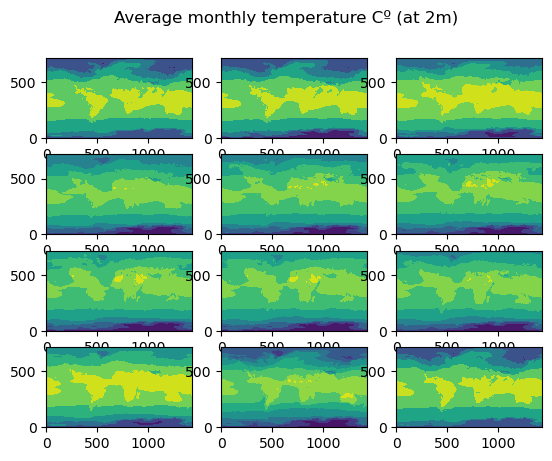

In [12]:
# clevs = np.arange(-5, 36, 5)

# fg = ds_month_mean['t2m'].plot.contourf(
#     levels=clevs,
#     row='month',
#     col_wrap=3,
#     robust=True,
#     # cmap='RdBu_r',
#     extend='both',
#     subplot_kws={"projection": ccrs.PlateCarree()},
#     cbar_kwargs={
#         "orientation": "horizontal",
#         "shrink": 0.8,
#         "aspect": 40,
#         "label": "degC",
#     },
# )

# for ax in fg.axs.flat:
#     ax.coastlines()

# fig, axs = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(11,5.5))
# axs=axs.flatten()

# for i, mon in enumerate(ds_month_mean['month']):
#         data = ds_month_mean['t2m'].sel(month=mon)
#         data, lons = add_cyclic_point(data,coord=ds_month_mean['lon'])
#         cs=axs[i].contourf(lons, ds_month_mean['lat'], data, clevs, transform = ccrs.PlateCarree(), cmap='coolwarm', extend='both')

# plt.subplot(4, 3, 1)
# plt.contourf(ds_month_mean['t2m'].sel(month=1))

for i, mon in enumerate(local_mean_file['month']):
    plt.subplot(4,3,i+1)
    plt.contourf(local_mean_file['t2m'].sel(month=i+1))

plt.suptitle('Average monthly temperature Cº (at 2m)')